In [47]:
# Generic imports

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import stlstuff as sls
import imagestuff as ims
import matplotlib.pyplot as plt
import copy

fontsize = 25
linewidth = 2
%matplotlib notebook

In [48]:
# Get the retrieved surface
case= 'crystals/2017-06-14_ice5/case1.1'
npzfile = np.load(case+'/retrieved.npz')
surfaceroot = np.array_str(npzfile['surfaceroot'])
imageroot = np.array_str(npzfile['imageroot'])

dx,dy,cA,cB,cC,cD,Filename = ims.getc2(surfaceroot, '/SEMimages', imageroot)
nx1list = npzfile['nx1list']
nx2list = npzfile['nx2list']
ny1list = npzfile['ny1list']
ny2list = npzfile['ny2list']

nxi = npzfile['nxi']; print(nxi)
nyi = npzfile['nyi']; print(nyi)
dnx = npzfile['dnx']; print(dnx)
dny = npzfile['dny']; print(dny)

solution = npzfile['solution']; print(np.shape(solution))

[-5.         -4.90196078 -4.80392157 -4.70588235 -4.60784314 -4.50980392
 -4.41176471 -4.31372549 -4.21568627 -4.11764706 -4.01960784 -3.92156863
 -3.82352941 -3.7254902  -3.62745098 -3.52941176 -3.43137255 -3.33333333
 -3.23529412 -3.1372549  -3.03921569 -2.94117647 -2.84313725 -2.74509804
 -2.64705882 -2.54901961 -2.45098039 -2.35294118 -2.25490196 -2.15686275
 -2.05882353 -1.96078431 -1.8627451  -1.76470588 -1.66666667 -1.56862745
 -1.47058824 -1.37254902 -1.2745098  -1.17647059 -1.07843137 -0.98039216
 -0.88235294 -0.78431373 -0.68627451 -0.58823529 -0.49019608 -0.39215686
 -0.29411765 -0.19607843 -0.09803922  0.          0.09803922  0.19607843
  0.29411765  0.39215686  0.49019608  0.58823529  0.68627451  0.78431373
  0.88235294  0.98039216  1.07843137  1.17647059  1.2745098   1.37254902
  1.47058824  1.56862745  1.66666667  1.76470588  1.8627451   1.96078431
  2.05882353  2.15686275  2.25490196  2.35294118  2.45098039  2.54901961
  2.64705882  2.74509804  2.84313725  2.94117647  3

30
150


<IPython.core.display.Javascript object>


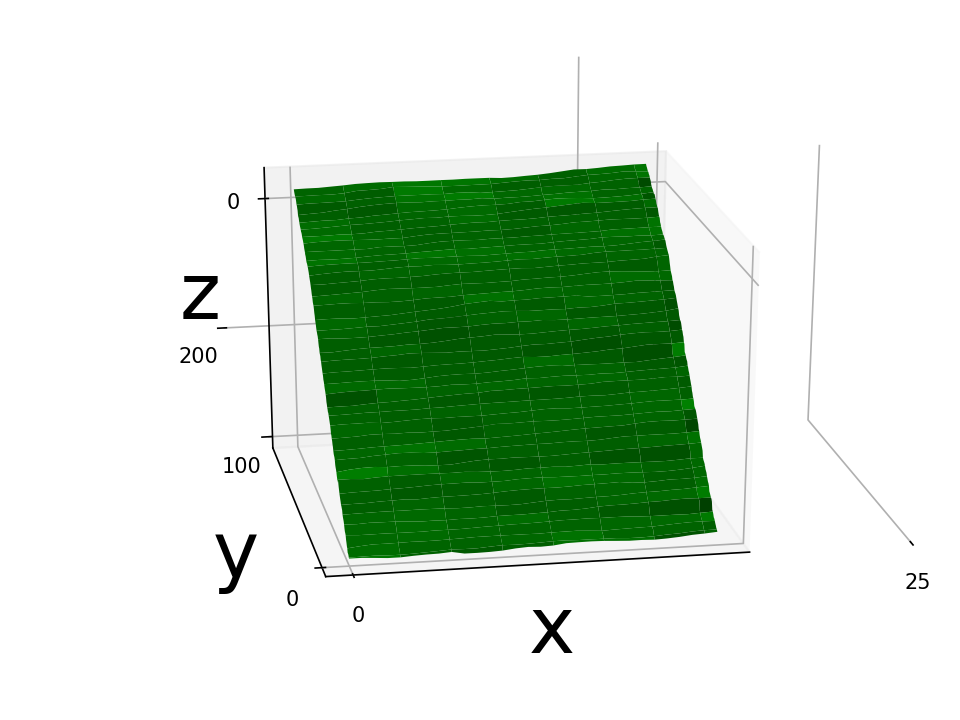

In [49]:
# Show the reconstructed surface
nx1tot = min(nx1list)
nx2tot = max(nx2list)
ny1tot = min(ny1list)
ny2tot = max(ny2list)
nxtot = nx2tot-nx1tot; print (nxtot)
nytot = ny2tot-ny1tot; print (nytot)
ymaxtot = (nytot-1)*dy; xmaxtot = (nxtot-1)*dx

surf_ytot = np.linspace(0,ymaxtot,nytot); #print surf_ytot[1]-surf_ytot[0]; 
surf_xtot = np.linspace(0,xmaxtot,nxtot); #print surf_xtot[1]-surf_xtot[0]; 
surf_xgridtot, surf_ygridtot = np.meshgrid(surf_xtot,surf_ytot)
surf_ygridtot_flipped = np.flipud(surf_ygridtot)
settemp = solution[ny1tot:ny2tot,nx1tot:nx2tot]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(surf_xgridtot, surf_ygridtot_flipped, settemp, rstride=4,cstride=4, color='g')
ax.view_init(azim=-100,elev=22)
ax.set_xlabel('x',fontsize=fontsize*1.5)
ax.set_ylabel('y',fontsize=fontsize*1.5)
ax.set_zlabel('z',fontsize=fontsize*1.5)

# Tailor these lines for each case
ax.set_xticks([i for i in range(0,100,25)])
ax.set_yticks([i for i in range(0,250,100)])
ax.set_zticks([i for i in range(0,100,50)])

In [50]:
# create a new settemp2
settemp2 = copy.deepcopy(settemp)
depth=-5
ny, nx=np.shape(settemp); print(ny,nx)
yline=depth * np.ones(ny); print(np.shape(yline)); print(yline)

150 30
(150,)
[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5.]


In [51]:
sls.numpy2stl(settemp2, outfile, scale=dnx, solid=False)
print('Complete')

Creating top mesh...
Complete


In [52]:
dummy = np.array([[0,1],[6,9]]); print(dummy)
dummy2=np.array([ [4],[3] ]); print(dummy2)
np.append(dummy,dummy2)

[[0 1]
 [6 9]]
[[4]
 [3]]


array([0, 1, 6, 9, 4, 3])

In [53]:
whos

Variable                Type             Data/Info
--------------------------------------------------
Axes3D                  type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
Filename                str              crystals/2017-06-14_ice5/<...>.1/SEMimages/Figure-D.bmp
ax                      Axes3DSubplot    Axes(0.125,0.11;0.775x0.77)
cA                      ndarray          480x640: 307200 elems, type `uint8`, 307200 bytes (300.0 kb)
cB                      ndarray          480x640: 307200 elems, type `uint8`, 307200 bytes (300.0 kb)
cC                      ndarray          480x640: 307200 elems, type `uint8`, 307200 bytes (300.0 kb)
cD                      ndarray          480x640: 307200 elems, type `uint8`, 307200 bytes (300.0 kb)
case                    str              crystals/2017-06-14_ice5/case1.1
copy                    module           <module 'copy' from 'C:\\<...>Anaconda3\\lib\\copy.py'>
depth                   int              -5
dnx                    